1. Import required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\prmma\Downloads\Apps_data+(1).csv")

2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [6]:
# Get summary statistics of numerical columns
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.describe(include = 'object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


4. Check if there are any duplicate records in the dataset? if any drop them.

In [8]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Check the new shape of the DataFrame
print(df.shape)

(10358, 13)


5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [9]:
# Check the unique categories in the 'Category' column
print(df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [10]:
# Drop rows with invalid category values
invalid_categories = ['invalid_category1', 'invalid_category2']
df = df[~df['Category'].isin(invalid_categories)]

6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [11]:
# Check for missing values in the 'Rating' column
print(df['Rating'].isnull().sum())

1465


In [12]:
# Drop rows with missing values in the 'Rating' column
df.dropna(subset=['Rating'], inplace=True)

# Check the new shape of the DataFrame
print(df.shape)

(8893, 13)


In [13]:
# Define a function to categorize the ratings
def categorize_rating(rating):
    if rating > 3.5:
        return 'high'
    else:
        return 'low'

# Apply the function to create a new column 'Rating_category'
df['Rating_category'] = df['Rating'].apply(categorize_rating)

# Check the first few rows of the DataFrame
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high


7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [14]:
df['Rating_category'] = np.where(df['Rating'] > 3.5, 'High', 'Low')
df['Rating_category'].value_counts(normalize=True)


Rating_category
High    0.901046
Low     0.098954
Name: proportion, dtype: float64

8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

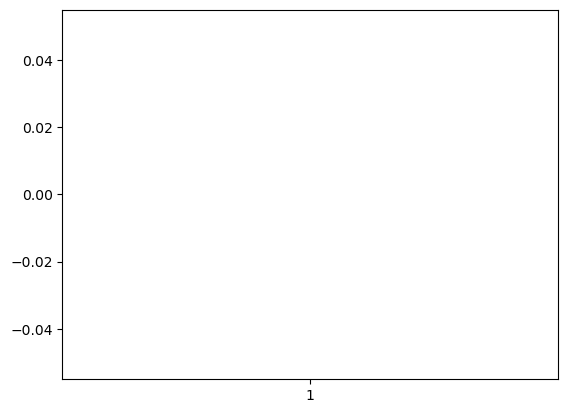

In [15]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

plt.boxplot(df['Reviews'])
plt.show()


9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [16]:
df['Size'] = df['Size'].replace('Varies with device', np.nan)  # replace 'Varies with device' with NaN
df['Size'] = df['Size'].str.replace('M', '000000').str.replace('k', '000')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df.dropna(subset=['Size'])
print(df['Size'].dtype)
# Check the first few rows of the DataFrame
df.head()

float64


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [17]:
df = df[df['Installs'] != 'Free']
# remove commas and plus signs from the column
df['Installs'] = df['Installs'].astype(str).str.replace('+', '').str.replace(',', '').astype(int)
# check the data type and summary statistics of the column
print(df['Installs'].dtype)
print(df['Installs'].describe())
df.head()

int32
count    8.892000e+03
mean     1.648965e+07
std      8.637600e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [18]:
df = df[df['Price'] != 'Everyone']
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype('float')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [19]:
df.drop(['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,159.0,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,967.0,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,87510.0,8.7,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,215644.0,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,967.0,2.8,100000,Free,0.0,Everyone,High


13. Encode the categorical columns.

In [20]:
# create a list of categorical columns to encode
cat_cols = ['Category', 'Type', 'Content Rating']

# encode categorical columns using get_dummies()
df_encoded = pd.get_dummies(df, columns=cat_cols)

# display the encoded DataFrame
df_encoded.head()


,Reviews,Size,Installs,Price,Rating_category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159.0,19000000.0,10000,0.0,High,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,967.0,14000000.0,500000,0.0,High,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,87510.0,8.7,5000000,0.0,High,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,215644.0,25000000.0,50000000,0.0,High,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,967.0,2.8,100000,0.0,High,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [21]:
# Segregate target and independent features
X = df.drop('Rating_category', axis=1)
y = df['Rating_category']

15. Split the dataset into train and test.

In [22]:
from sklearn.model_selection import train_test_split

# Split the dataset into independent and target variables
X = df.drop('Rating_category', axis=1)
y = df['Rating_category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train, X_test, y_train, y_test 

(                 Category    Reviews        Size  Installs  Type  Price  \
 1861                 GAME  2045554.0  28000000.0  50000000  Free   0.00   
 5465               FAMILY        3.0         1.5      1000  Paid   2.99   
 3602            PARENTING      717.0         6.6    100000  Free   0.00   
 9427                TOOLS        2.0  19000000.0        10  Free   0.00   
 8215                TOOLS      154.0         6.6     10000  Free   0.00   
 ...                   ...        ...         ...       ...   ...    ...   
 6760  BOOKS_AND_REFERENCE       47.0         1.4      1000  Paid   3.08   
 6038             BUSINESS       63.0  13000000.0      5000  Free   0.00   
 6295               FAMILY   205914.0  54000000.0  10000000  Free   0.00   
 1069              FINANCE    21996.0  14000000.0   1000000  Free   0.00   
 8751       FOOD_AND_DRINK    10225.0  36000000.0   1000000  Free   0.00   
 
      Content Rating  
 1861           Teen  
 5465       Everyone  
 3602       Every

16. Standardize the data, so that the values are within a particular range.

In [24]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical columns
num_cols = ['Reviews', 'Size', 'Installs', 'Price']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [25]:
X_test[num_cols]

,Reviews,Size,Installs,Price
6216,-0.173304,-0.842362,-0.189131,-0.057377
3999,-0.146546,-0.842362,-0.178280,-0.057377
6010,-0.176437,-0.315757,-0.189734,-0.057377
1962,1.084037,0.494405,0.412495,-0.057377
1687,-0.148740,2.600825,-0.069770,-0.057377
...,...,...,...,...
10408,-0.045252,0.251356,0.412495,-0.057377
4586,1.035072,NaN,1.015328,-0.057377
8665,-0.176129,-0.842361,-0.189131,-0.057377
5125,-0.176655,2.155236,-0.190331,-0.057377
